In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98', 'ff99SBnmr', 'ff03.r1', 'ff14SB']  # The name of the state directories
prots = ['E4K42', 'K4E42']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    for igb in igbs:
    #igbff_all = []
        for prot in prots:
            direc=igb + '_'+ ff + '_'+ prot
            # For each system and state, grab all the data files that match the glob
            file_glob = os.path.join(root_path, direc, filename_pattern)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
                df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
                df['Helicity (%)'] = df['Fraction helicity']*100*21/19
                df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
                df['igb'] = igb
                df['ff'] = ff
                df['Peptide'] = prot
                df['igbff'] = '{0} {1}'.format(ff, igb)
                df['igbffprot'] = '{0} {1} {2}'.format(ff, igb, prot)
                igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.714         0.0000     78.915789              NaN   
1   2502              0.667         0.0001     73.721053              NaN   
2   2503              0.714         0.0002     78.915789              NaN   
3   2504              0.714         0.0003     78.915789              NaN   
4   2505              0.667         0.0004     73.721053              NaN   

    igb    ff Peptide      igbff        igbffprot  
0  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
1  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
2  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
3  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
4  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  


In [3]:
85.7*21/19

94.72105263157896

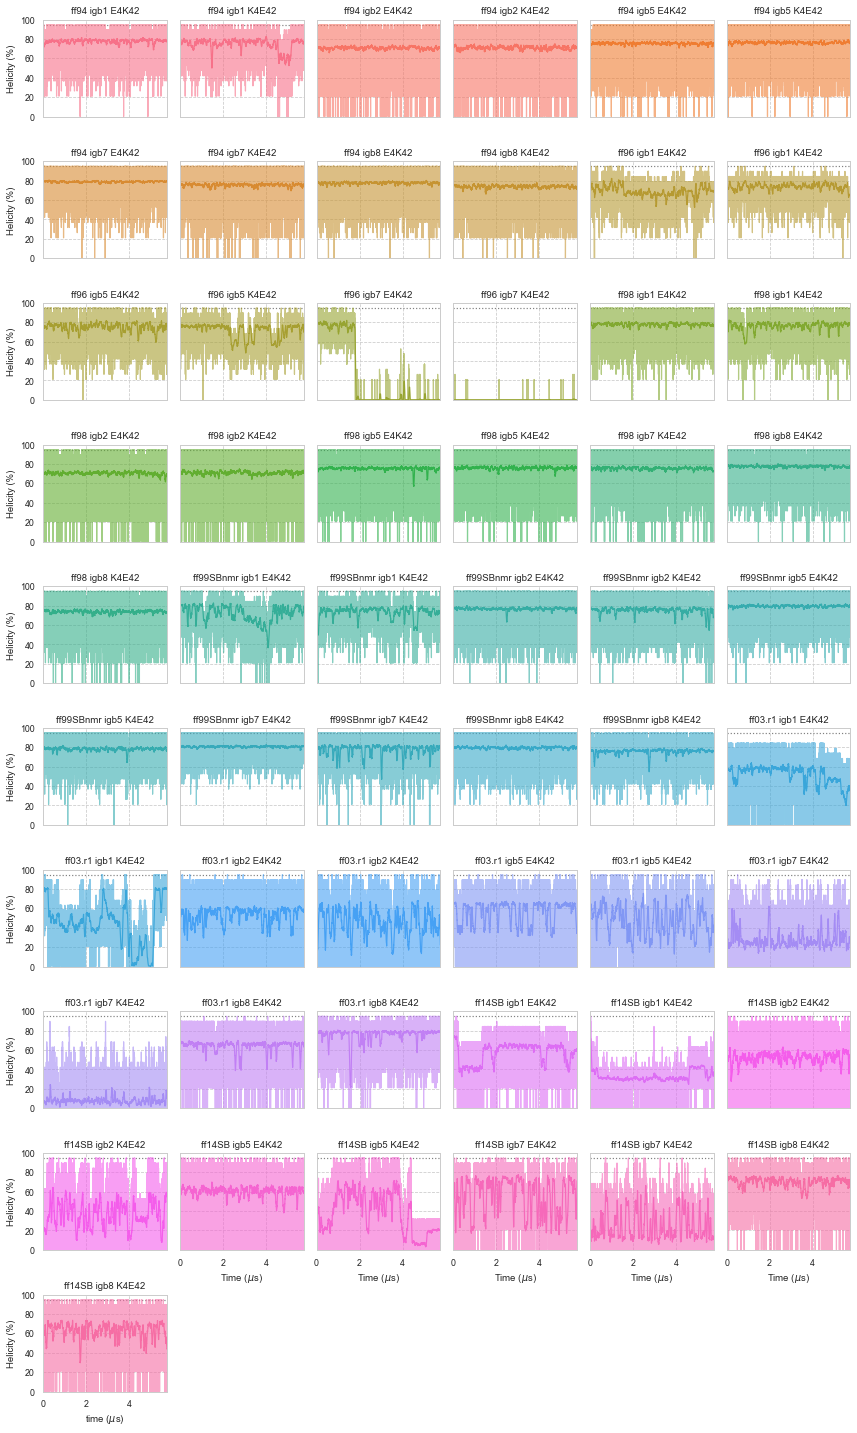

In [15]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="igbffprot", col_wrap=6, hue="igbff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=94.72, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_1.pdf')
plt.savefig('./plots/helicity_1.png', dpi=300)
plt.show()

In [6]:
df_total.groupby('igbffprot')['Helicity (%)'].mean()

igbffprot
fb15 igb7 E4K42         76.128872
fb15 igb7 K4E42         59.719061
ff03.r1 igb1 E4K42      51.606312
ff03.r1 igb1 K4E42      45.851487
ff03.r1 igb2 E4K42      52.258758
ff03.r1 igb2 K4E42      44.831938
ff03.r1 igb5 E4K42      55.943722
ff03.r1 igb5 K4E42      47.543751
ff03.r1 igb7 E4K42      27.751279
ff03.r1 igb7 K4E42       7.893515
ff03.r1 igb8 E4K42      63.968669
ff03.r1 igb8 K4E42      75.596255
ff14SB igb1 E4K42       57.333828
ff14SB igb1 K4E42       34.894027
ff14SB igb2 E4K42       51.712611
ff14SB igb2 K4E42       36.059715
ff14SB igb5 E4K42       60.012494
ff14SB igb5 K4E42       38.669313
ff14SB igb7 E4K42       55.553870
ff14SB igb7 K4E42       25.185096
ff14SB igb8 E4K42       69.890152
ff14SB igb8 K4E42       62.798334
ff15ipq igb7 E4K42      20.195685
ff15ipq igb7 K4E42      50.502847
ff94 igb1 E4K42         77.587974
ff94 igb1 K4E42         74.451716
ff94 igb2 E4K42         70.546403
ff94 igb2 K4E42         70.929467
ff94 igb5 E4K42         75.234956
ff94

In [7]:
df_total.groupby(['igbff','Peptide'])['Helicity (%)'].mean()

igbff           Peptide
fb15 igb7       E4K42      76.128872
                K4E42      59.719061
ff03.r1 igb1    E4K42      51.606312
                K4E42      45.851487
ff03.r1 igb2    E4K42      52.258758
                K4E42      44.831938
ff03.r1 igb5    E4K42      55.943722
                K4E42      47.543751
ff03.r1 igb7    E4K42      27.751279
                K4E42       7.893515
ff03.r1 igb8    E4K42      63.968669
                K4E42      75.596255
ff14SB igb1     E4K42      57.333828
                K4E42      34.894027
ff14SB igb2     E4K42      51.712611
                K4E42      36.059715
ff14SB igb5     E4K42      60.012494
                K4E42      38.669313
ff14SB igb7     E4K42      55.553870
                K4E42      25.185096
ff14SB igb8     E4K42      69.890152
                K4E42      62.798334
ff15ipq igb7    E4K42      20.195685
                K4E42      50.502847
ff94 igb1       E4K42      77.587974
                K4E42      74.451716
ff94 igb2     

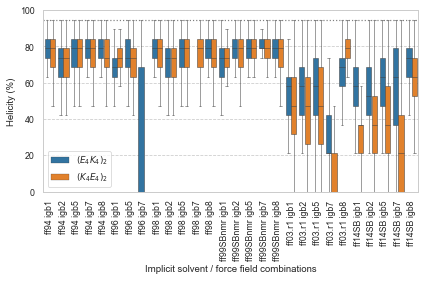

In [14]:
deep2=["#C44E52", "#4C72B0","#8172B2" ,"#4C72B0","#4C72B0",
       "#64B5CD", "#CCB974", "#55A868"]

sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'}, color_codes=False)

# fig, axes = plt.subplots(figsize=(12, 10))
fig, axes = plt.subplots()

ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='Peptide', data=df_total, fliersize=0, linewidth=0.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')

handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["$(E_4K_4)_2$", "$(K_4E_4)_2$"], loc='lower left') # Associate manually the artists to a label.

plt.axhline(y=94.72, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf', dpi=600)
#plt.legend(loc='lower left')
plt.savefig('./plots/helicity_boxplot_1.png', dpi=300)
plt.savefig('./plots/helicity_boxplot_1.pdf')